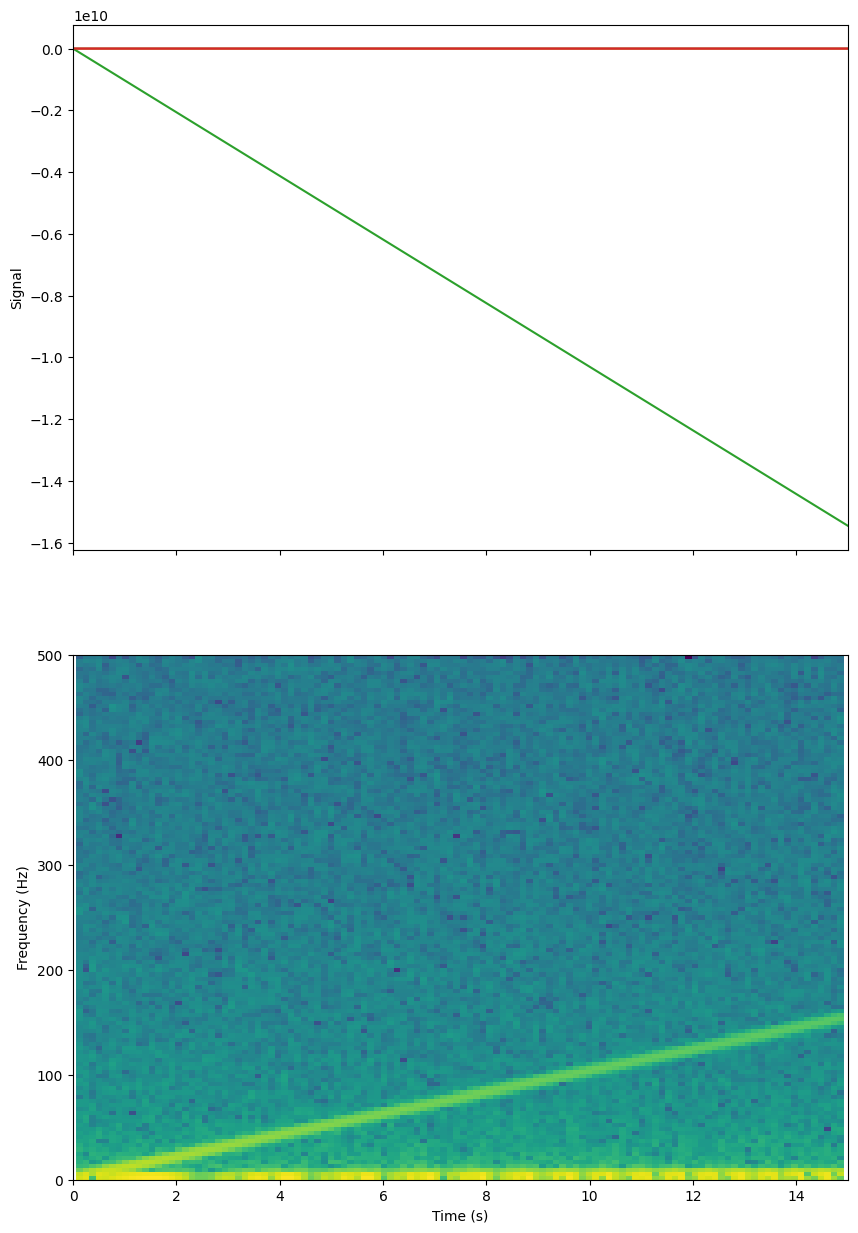

In [108]:
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np

dataList = []

def rpmToHz(rpm):
  return rpm / 60.0

def oscillation1f(amplitude, frequencyHz, t, phaseShift = 0):
  return amplitude * np.sin(2.0 * np.pi * frequencyHz * t + phaseShift)

def interpolate(x, y, i):
  return x * (1.0 - i) + y * i

output = 0.0

def lowpass(dt, cutoffFrequency, value):
  global output
  ePow = 1.0 - math.exp(-dt * 2.0 * math.pi * cutoffFrequency)
  output += (value - output) * ePow
  return output


propThrustFactor = 2.1
propAFactor = 0.375e-08
propMaxRpm = 22000


# Fixing random state for reproducibility
np.random.seed(19680801)

frequency = 1e3
delta = 1e6 / frequency

dt = delta / 1e6

time = 15
maxRpm1 = 60
maxRpm2 = 120
maxRpm3 = 4640
maxRpm4 = 27000

t = np.arange(0.0, time, dt)

amp = np.linspace(0, 1, len(t))
rpm1 = np.linspace(0, maxRpm1, len(t))
rpm2 = np.linspace(0, maxRpm2, len(t))
rpm3 = np.linspace(0, maxRpm3, len(t))
rpm4 = np.linspace(0, maxRpm4, len(t))
s1x = oscillation1f(1.0, rpmToHz(rpm1),t)
s2x = oscillation1f(1.0, rpmToHz(rpm2),t)
s3x = oscillation1f(1.0, rpmToHz(rpm3),t)

# add some noise into the mix
nse1 = 0.5 * np.random.random(size=len(t))

sig = s1x + s2x + s3x + nse1

thrust = ((propThrustFactor - propAFactor * propMaxRpm*propMaxRpm) / propMaxRpm) * rpm4 + propAFactor * rpm4 * rpm4
thrust2 = ((propThrustFactor - propAFactor * propMaxRpm) / propMaxRpm) * rpm4 + propAFactor * rpm4 * rpm4

x = np.vectorize(lowpass)(dt, 10, sig)

NFFT = 256  # the length of the windowing segments
Fs = 1/dt  # the sampling frequency

fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, figsize=(10, 15))
ax1.plot(t, sig)
ax1.plot(t, x)
ax1.plot(t, thrust)
ax1.plot(t, thrust2)

ax1.set_ylabel('Signal')

Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, mode='psd')
# The `specgram` method returns 4 objects. They are:
# - Pxx: the periodogram
# - freqs: the frequency vector
# - bins: the centers of the time bins
# - im: the .image.AxesImage instance representing the data in the plot
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_xlim(0, time)
ax2.set_ylim(0, 500)

plt.show()